# 项目要求
- 通过逻辑回归的算法，将原始新闻文本数据分类为国内新闻和国际新闻

# 数据描述

- 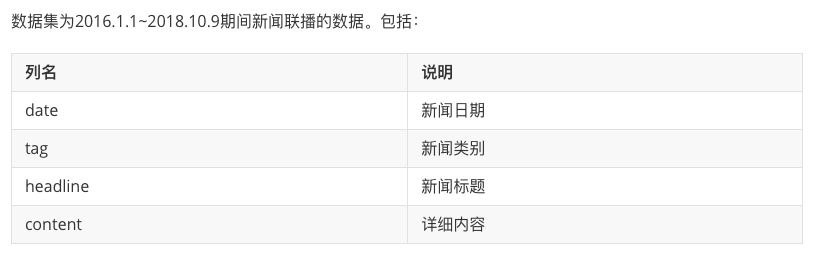

# 加载数据集

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set(style='darkgrid',font_scale=1.2)
plt.rcParams['font.family']='SimHei'
plt.rcParams['axes.unicode_minus']=False

news=pd.read_csv('./news.csv')
print(news.shape)
display(news.head())

(20738, 4)


,date,tag,headline,content
0,2016-01-01,详细全文,陆军领导机构火箭军战略支援部队成立大会在京举行 习近平向中国人民解放军陆军火箭军战略支援部队...,中国人民解放军陆军领导机构、中国人民解放军火箭军、中国人民解放军战略支援部队成立大会2015...
1,2016-01-01,详细全文,中央军委印发《关于深化国防和军队改革的意见》,经中央军委主席习近平批准，中央军委近日印发了《关于深化国防和军队改革的意见》。\n《意见》强...
2,2016-01-01,详细全文,《习近平关于严明党的纪律和规矩论述摘编》出版发行,由中共中央纪律检查委员会、中共中央文献研究室编辑的《习近平关于严明党的纪律和规矩论述摘编》一...
3,2016-01-01,详细全文,以实际行动向党中央看齐 向高标准努力,广大党员干部正在积极学习习近平总书记在中央政治局专题民主生活会上的重要讲话。大家纷纷表示要把...
4,2016-01-01,详细全文,【年终特稿】关键之年 改革挺进深水区,刚刚过去的2015年，是全面深化改革的关键之年。改革集中发力在制约经济社会发展的深层次矛盾，...


# 数据预处理
- 新闻是文本数据。文本，视频，图像都属于非结构化数据（即无法合理的表示为多行多列的形式），相反的结构类型是结构化数据。
- 文本数据预处理包括以下内容
    - 缺失值处理
    - 重复值处理
    - 文本内容清洗
    - 分词
    - 停用词处理

## 缺失值处理
- 检测是否存在缺失值，并对缺失值进行处理

In [4]:
news.isnull().sum()

date          0
tag           0
headline      0
content     107
dtype: int64

- 内容类存在缺失值。
- 填充方法为使用标题对缺失值进行填充

In [7]:
news[news['content'].isnull()]

,date,tag,headline,content
30,2016-01-03,详细全文,新年贺卡：2016只要付出 总有回报,NaN
563,2016-02-03,详细全文,习近平春节前夕赴江西看望慰问广大干部群众 祝全国各族人民健康快乐吉祥 祝改革发展人民生活蒸蒸日上,NaN
576,2016-02-04,详细全文,俞正声会见柬埔寨副首相,NaN
578,2016-02-04,详细全文,国务院印发《关于钢铁行业化解过剩产能实现脱困发展的意见》,NaN
590,2016-02-04,国内,新一轮叙利亚问题和谈暂时中止,NaN
...,...,...,...,...
18105,2018-06-08,详细全文,中华人民共和国“友谊勋章”颁授仪式在京隆重举行 习近平向俄罗斯总统授予首枚“友谊勋章”,NaN
19952,2018-09-02,详细全文,联合国机构称继续服务巴勒斯坦难民,NaN
20141,2018-09-10,详细全文,栗战书访问朝鲜并出席朝鲜建国70周年庆祝活动,NaN
20283,2018-09-17,详细全文,栗战书在浙江就加强地方人大工作调研,NaN


In [119]:
index=news[news['content'].isnull()].index

In [120]:
news.loc[index,'content']=news.loc[index,'headline']
#或者是
# news['content'][index]=news['headline'][index]
news.isnull().sum()

date        0
tag         0
headline    0
content     0
dtype: int64

In [17]:
#检验填充结果
news.iloc[index].sample(5)
#或者是
# news.loc[index].sample(5)

,date,tag,headline,content
10328,2017-06-06,国际,德外长称将撤出德在土耳其驻军,德外长称将撤出德在土耳其驻军
3355,2016-07-02,详细全文,《伟大的旗帜》今晚播出,《伟大的旗帜》今晚播出
18105,2018-06-08,详细全文,中华人民共和国“友谊勋章”颁授仪式在京隆重举行 习近平向俄罗斯总统授予首枚“友谊勋章”,中华人民共和国“友谊勋章”颁授仪式在京隆重举行 习近平向俄罗斯总统授予首枚“友谊勋章”
4150,2016-08-11,国内,“菲鱼”代言 拔罐从里约走红世界,“菲鱼”代言 拔罐从里约走红世界
1689,2016-04-07,详细全文,【稳增长调结构转方式·杭州调研行】打造最严格监管 把青山绿水护得更美,【稳增长调结构转方式·杭州调研行】打造最严格监管 把青山绿水护得更美


## 重复值处理
- 对于重复数据可以直接删除

In [18]:
news.duplicated().sum()

5

In [22]:
display(news[news.duplicated()])

,date,tag,headline,content
13280,2017-10-24,详细全文,中国共产党第十九届中央委员会委员名单,中国共产党第十九届中央委员会委员名单
13284,2017-10-24,详细全文,中国共产党第十九届中央委员会候补委员名单,中国共产党第十九届中央委员会候补委员名单
13288,2017-10-24,详细全文,中国共产党第十九届中央纪律检查委员会委员名单,中国共产党第十九届中央纪律检查委员会委员名单
13305,2017-10-25,详细全文,中国共产党第十九届中央委员会第一次全体会议公报,中国共产党第十九届中央委员会第一次全体会议公报
13325,2017-10-25,详细全文,中国共产党第十九届中央纪律检查委员会第一次全体会议公报,中国共产党第十九届中央纪律检查委员会第一次全体会议公报


In [121]:
#删除重复的数据，并检测是否删除成功
news.drop_duplicates(inplace=True)
news.duplicated().sum()

0

## 文本内容清洗
- 文本中的标点符号与一些特殊字符（！、｜。。。）对文本分析的作用不大，因此可以去除

In [122]:
import re

pattern=r'[^\w]'
re_obj=re.compile(pattern)

def clear(text):
    return re_obj.sub('',text)

news['content']=news['content'].apply(clear)

#或者是，但不建议
#re.sub(pattern,"",text)在底部也会创建re_obj对象，影响内存消耗
# pattern=r"[!\"#$%&'()*+,-/:;<=>?@[\\\]^_`{|}~-！，。？·、¥。。。...（）：；【】《》“‘”’s]+"
# re_obj=re.compile(pattern)

# def clear(text):
#     return re.sub(pattern,"",text)

## 分词
- 分词是将连续的文本分割成语义合理的若干词汇序列。英文分词通过去除标点符号和换行符后利用split(' ',text)进行拆分为单词
- 中文分词采用jieba模块来实现
    - jieba.cut()返回生成器，数据量大时选择cut()
    - jieba.lcut()返回列表

In [123]:
import jieba

def cut_word(text):
    return jieba.cut(text)

news['content']=news['content'].apply(cut_word)
#生成器只用一次，只有在print时才生成列表，遍历时从前到后依次取出

In [27]:
#查看结果
news.sample(5)
#此时content返回的是计算规则

,date,tag,headline,content
18543,2018-06-29,详细全文,习近平向土耳其当选总统埃尔多安致贺电,<generator object Tokenizer.cut at 0x7fbd85627...
10102,2017-05-28,详细全文,牢记使命 做党和人民的忠诚卫士,<generator object Tokenizer.cut at 0x7fbd83742...
2504,2016-05-18,详细全文,习近平举行仪式欢迎莫桑比克总统访华,<generator object Tokenizer.cut at 0x7fbd83aa5...
20010,2018-09-05,详细全文,李克强会见尼日利亚总统,<generator object Tokenizer.cut at 0x7fbd83f7a...
8600,2017-03-23,国际,美威斯康星州发生连环枪击4人死亡,<generator object Tokenizer.cut at 0x7fbd83b84...


## 停用词处理
- 停用词是指在语句中大量出现，但却对语义分析没有帮助的词。对于这样的词汇，可以将其删除，好处在于：
    - 可以降低存储空间消耗
    - 可以减少计算时间消耗
- 对于停用词处理。可以使用专用统计好的停用词列表

In [31]:
with open('stopword.txt') as f:
    print(f.readlines()[:5])

['\ufeff!\n', '"\n', '#\n', '$\n', '%\n']


- 停用词中显示是一行一个停用词

In [124]:
def get_stopword():
    s=set()
    with open('stopword.txt',encoding='utf-8') as f:
        for line in f:
            s.add(line.strip())#strip()去除左右空格
    #返回一个停用词集合
    return s
    
def remove_stopword(words):
    return [word for word in words if word not in stopword]

stopword=get_stopword()
news['content']=news['content'].apply(remove_stopword)

#或者是用list装stopword，但不建议
#原因是在set中查找的时间复杂度比在list中小
#在set 中查找的时间复杂度为O(1)
#在list 中查找的时间复杂度为O(n)
#1.
# def get_stopword():
#     l=list()
#     with open('stopword.txt',encoding='utf-8') as f:
#         for line in f:
#             l.append(line.strip())
#     return l

In [33]:
#查看结果
display(news.sample(5))

,date,tag,headline,content
13550,2017-11-06,详细全文,贴近实际解读 回应群众关切——中央宣讲团在各地继续宣讲,"[高度, 温度, 理论, 实践, 两天, 学习, 贯彻, 党, 十九, 精神, 中央, 宣讲..."
14001,2017-11-26,详细全文,李克强离京出席第六次中国—中东欧国家领导人会晤并访问匈牙利 出席上海合作组织成员国总理第十六次会议,"[应, 匈牙利, 总理, 欧尔, 班, 俄罗斯, 总理, 梅德韦, 杰夫, 邀请, 国务院,..."
15030,2018-01-13,国际,俄宣布俄驻叙基地袭击者已被消灭,"[俄罗斯国防部, 12, 日, 俄军, 叙利亚, 西北部, 伊, 德利, 卜省, 发射, 激..."
10345,2017-06-07,国内,上海查获全国首起毒品行李箱走私案,"[上海浦东, 机场, 海关, 查获, 全国, 首, 毒品, 行李箱, 走私案, 缴获, 可卡..."
19282,2018-08-03,国际,朝鲜媒体号召全国抗击高温干旱,"[朝鲜劳动党中央委员会, 机关报, 劳动新闻, 日, 发表, 社论, 号召, 朝鲜, 部门,..."


# 数据探索

## 类别数量分布
- 统计每个类别tag包含的新闻数量

<AxesSubplot:xlabel='tag', ylabel='count'>

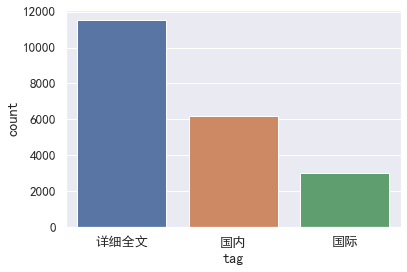

In [34]:
sns.countplot('tag',data=news)

## 年份数量分布
- 按年/月/日统计新闻的数量

In [37]:
t=news['date'].str.split('-',expand=True)
t.head()

,0,1,2
0,2016,01,01
1,2016,01,01
2,2016,01,01
3,2016,01,01
4,2016,01,01


Text(0, 0.5, '新闻数量')

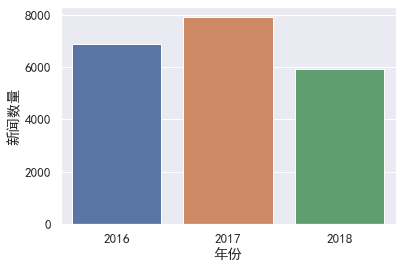

In [38]:
#按年统计
sns.countplot(0,data=t)
plt.xlabel('年份')
plt.ylabel('新闻数量')

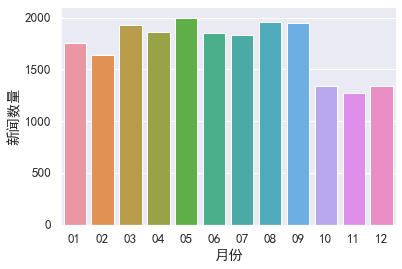

In [39]:
#按月统计
sns.countplot(1,data=t)
plt.xlabel('月份')
plt.ylabel('新闻数量')
plt.show()

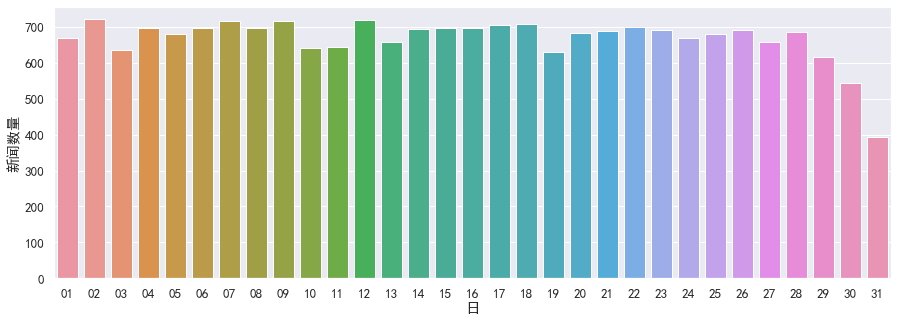

In [41]:
#按日统计
plt.figure(figsize=(15,5))
sns.countplot(2,data=t)
plt.xlabel('日')
plt.ylabel('新闻数量')
plt.show()

## 词汇统计

### 词汇频数统计
- 统计在所有新闻中，出现频数最多的N个词汇

In [70]:
from itertools import chain#用于将二维列表扁平化为一维列表
from collections import Counter

li_2d=news['content'].tolist()
#将二维列表扁平化为一维列表[[],[],[]]-->[ , , ]
li_1d=list(chain.from_iterable(li_2d))
print(f'总词汇量:{len(li_1d)}')
c=Counter(li_1d)
#计算每个词汇出现的频率
print(f'不重复词汇数量:{len(c)}')
#按取出前15个出现频率最高的词汇
common=c.most_common(15)
#或者转化为字典后进行排序sorted(dict(c).items(),key= lambda x:x[1],reverse=True )[:15]
print(common)

总词汇量:2191457
不重复词汇数量:94630
[('发展', 20414), ('中国', 18784), ('习近平', 13424), ('合作', 12320), ('新', 11666), ('年', 11643), ('国家', 10881), ('日', 10578), ('中', 10529), ('工作', 9328), ('建设', 8329), ('月', 8179), ('经济', 7239), ('主席', 6786), ('推动', 6271)]


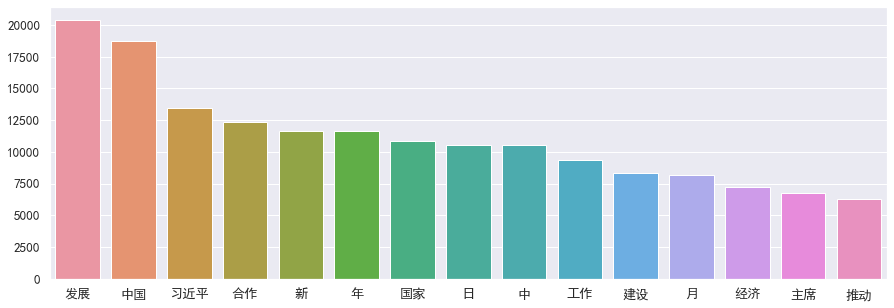

In [74]:
#将统计词汇频数可视化
d=dict(common)
plt.figure(figsize=(15,5))
sns.barplot(x=list(d.keys()),y=list(d.values()))
plt.show()

In [72]:
d.keys()

dict_keys(['发展', '中国', '习近平', '合作', '新', '年', '国家', '日', '中', '工作', '建设', '月', '经济', '主席', '推动'])

### 频率统计
- 将之前统计词汇的频数，转换成频率显示

['0.93%', '0.86%', '0.61%', '0.56%', '0.53%', '0.53%', '0.50%', '0.48%', '0.48%', '0.43%', '0.38%', '0.37%', '0.33%', '0.31%', '0.29%']


<AxesSubplot:>

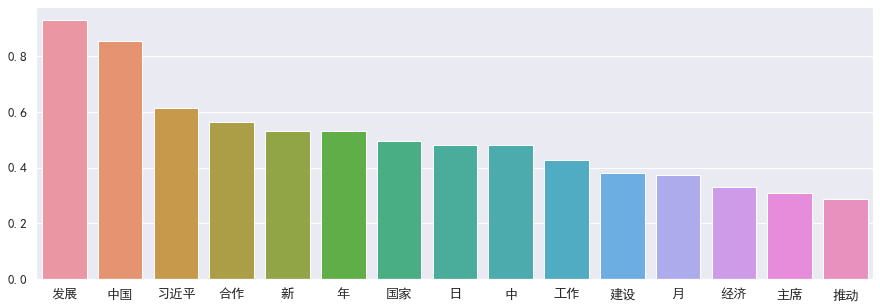

In [84]:
total=len(li_1d)
percentage=[v*100/total for v in d.values()]
print([f'{v:.2f}%' for v in percentage])
plt.figure(figsize=(15,5))
sns.barplot(x=list(d.keys()),y=percentage)

### 频数分布统计
- 绘制所有词汇的频数分布直方图

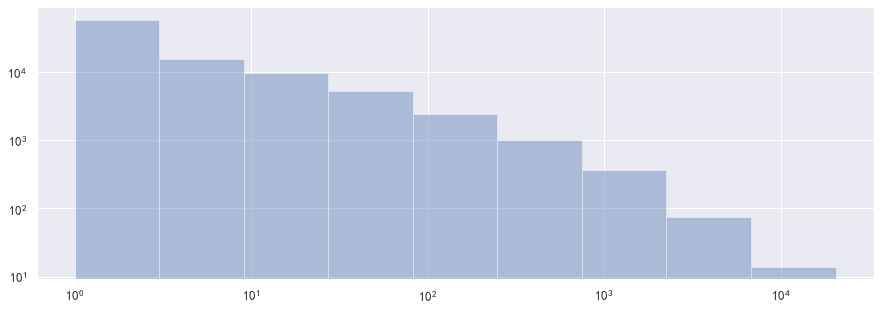

In [85]:
plt.figure(figsize=(15,5))
v=list(c.values())
end=np.log10(max(v))
ax=sns.distplot(v,bins=np.logspace(0,end,num=10),hist_kws={'log':True},kde=False)
#将频数取10的log后按大小分为9箱，y值为10的log后的结果
ax.set_xscale('log')

### 新闻词汇长度统计
- 统计每篇新闻的词汇数量，并绘制用词最多的前N篇新闻

<AxesSubplot:>

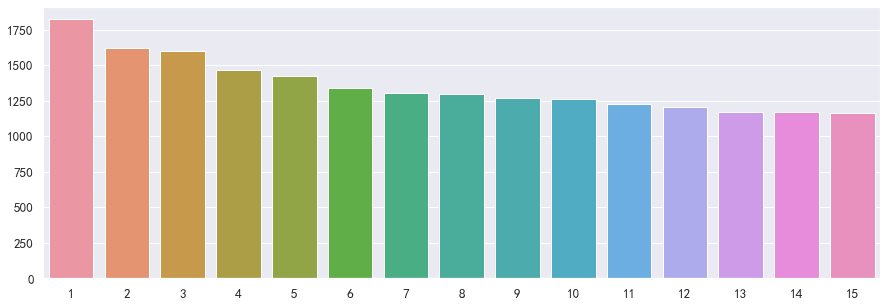

In [100]:
plt.figure(figsize=(15,5))
num=[len(li) for li in li_2d]
N=15
sns.barplot(np.arange(1,N+1),sorted(num,reverse=True)[:N])



In [92]:
data

,date,tag,headline,content,num
5582,2016-10-27,详细全文,中国共产党第十八届中央委员会第六次全体会议公报,"[中国共产党, 第十八届, 中央委员会, 第六次, 全体会议, 2016, 年, 10, 月...",1821
16309,2018-03-17,详细全文,十三届全国人大一次会议选举产生新一届国家领导人 习近平全票当选国家主席中央军委主席,"[十三届, 全国人大, 会议, 17, 日, 上午, 选举, 习近平, 中华人民共和国, 主...",1619
20507,2018-09-28,详细全文,习近平在东北三省考察并主持召开深入推进东北振兴座谈会时强调 解放思想锐意进取深化改革破解矛盾...,"[中共中央, 总书记, 国家, 主席, 中央军委, 主席, 习近平, 近日, 东北三省, 考...",1596
7036,2017-01-08,详细全文,中国共产党第十八届中央纪律检查委员会第七次全体会议公报,"[中国共产党, 第十八届, 中央纪律检查委员会, 第七次, 全体会议, 今天下午, 北京, ...",1466
190,2016-01-14,详细全文,中国共产党第十八届中央纪律检查委员会第六次全体会议公报,"[中国共产党, 第十八届, 中央纪律检查委员会, 第六次, 全体会议, 今天下午, 北京, ...",1421
18228,2018-06-14,详细全文,习近平在山东考察时强调 切实把新发展理念落到实处 不断增强经济社会发展创新力,"[中共中央, 总书记, 国家, 主席, 中央军委, 主席, 习近平, 近日, 山东, 考察,...",1341
17164,2018-04-26,详细全文,习近平在深入推动长江经济带发展座谈会上强调 加强改革创新战略统筹规划引导 以长江经济带发展推...,"[中共中央, 总书记, 国家, 主席, 中央军委, 主席, 习近平, 26, 日, 下午, ...",1302
15697,2018-02-13,详细全文,习近平春节前夕赴四川看望慰问各族干部群众 祝福全国各族人民新春吉祥 祝愿伟大祖国更加繁荣昌盛,"[中华民族, 传统节日, 农历, 春节, 来临, 之际, 中共中央, 总书记, 国家, 主席...",1293
20139,2018-09-10,详细全文,习近平在全国教育大会上强调 坚持中国特色社会主义教育发展道路 培养德智体美劳全面发展的社会主...,"[全国, 教育, 大会, 10, 日, 北京, 中共中央, 总书记, 国家, 主席, 中央军...",1265
17650,2018-05-19,详细全文,习近平在全国生态环境保护大会上强调 坚决打好污染防治攻坚战 推动生态文明建设迈上新台阶,"[全国, 生态, 环境保护, 大会, 18, 日至, 19, 日, 北京, 中共中央, 总书...",1263


### 新闻词汇长度分布统计

<AxesSubplot:>

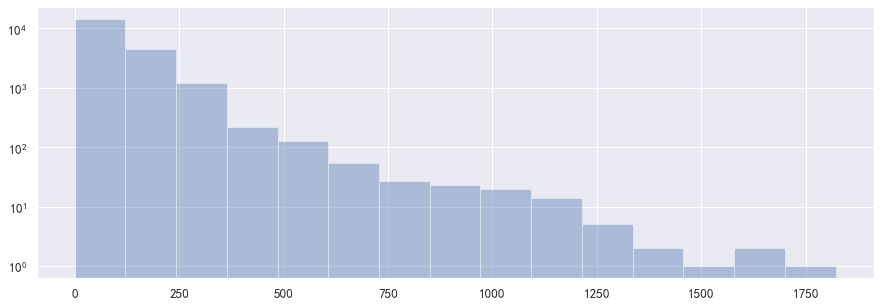

In [101]:
plt.figure(figsize=(15,5))
sns.distplot(num,bins=15,hist_kws={'log':True},kde=False)


## 生成词云图

In [106]:
c

Counter({'中国人民解放军': 103,
         '陆军': 216,
         '领导': 2626,
         '机构': 1543,
         '火箭': 297,
         '军': 264,
         '战略': 3678,
         '支援': 134,
         '部队': 884,
         '成立': 1118,
         '大会': 1394,
         '2015': 1284,
         '年': 11643,
         '12': 1826,
         '月': 8179,
         '31': 532,
         '日': 10578,
         '八一': 91,
         '大楼': 94,
         '隆重举行': 48,
         '中共中央': 1031,
         '总书记': 4250,
         '国家': 10881,
         '主席': 6786,
         '中央军委': 957,
         '习近平': 13424,
         '授予': 176,
         '军旗': 30,
         '并致': 9,
         '训词': 21,
         '代表': 3505,
         '党中央': 2774,
         '同志': 2374,
         '全军': 216,
         '致以': 263,
         '热烈祝贺': 140,
         '以党': 54,
         '新形势下': 415,
         '强军': 509,
         '目标': 1718,
         '引领': 1065,
         '贯彻': 1772,
         '军事': 621,
         '战略方针': 46,
         '全面实施': 103,
         '改革': 5910,
         '坚定不移': 476,
         '走': 1120,
 

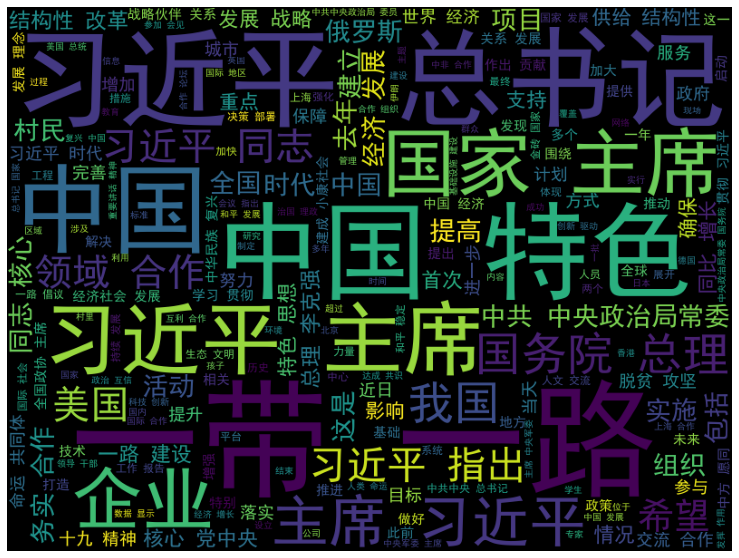

In [107]:
#普通词云图
from wordcloud import WordCloud

wc=WordCloud(font_path=r'/Library/Fonts/Microsoft/SimHei.ttf',width=800,height=600)
join_words=' '.join(li_1d)
img=wc.generate(join_words)
plt.figure(figsize=(15,10))
plt.imshow(img)
#去除格线
plt.axis('off')
wc.to_file('wordcloud.png')

(-0.5, 719.5, 595.5, -0.5)

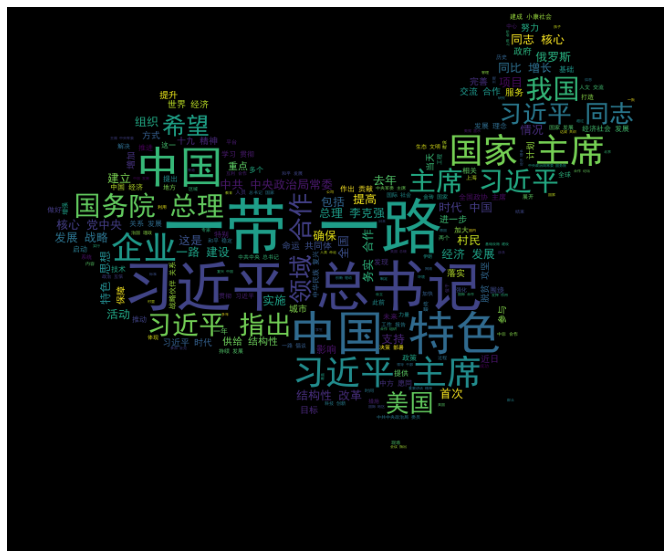

In [109]:
#自定义背景
wc=WordCloud(font_path=r'/Library/Fonts/Microsoft/SimHei.ttf',
mask=plt.imread('./map.jpg'))
img=wc.generate(join_words)
plt.figure(figsize=(15,10))
plt.imshow(img)
#去除格线
plt.axis('off')
# wc.to_file('wordcloud.png')

In [111]:
c

Counter({'中国人民解放军': 103,
         '陆军': 216,
         '领导': 2626,
         '机构': 1543,
         '火箭': 297,
         '军': 264,
         '战略': 3678,
         '支援': 134,
         '部队': 884,
         '成立': 1118,
         '大会': 1394,
         '2015': 1284,
         '年': 11643,
         '12': 1826,
         '月': 8179,
         '31': 532,
         '日': 10578,
         '八一': 91,
         '大楼': 94,
         '隆重举行': 48,
         '中共中央': 1031,
         '总书记': 4250,
         '国家': 10881,
         '主席': 6786,
         '中央军委': 957,
         '习近平': 13424,
         '授予': 176,
         '军旗': 30,
         '并致': 9,
         '训词': 21,
         '代表': 3505,
         '党中央': 2774,
         '同志': 2374,
         '全军': 216,
         '致以': 263,
         '热烈祝贺': 140,
         '以党': 54,
         '新形势下': 415,
         '强军': 509,
         '目标': 1718,
         '引领': 1065,
         '贯彻': 1772,
         '军事': 621,
         '战略方针': 46,
         '全面实施': 103,
         '改革': 5910,
         '坚定不移': 476,
         '走': 1120,
 

(-0.5, 719.5, 595.5, -0.5)

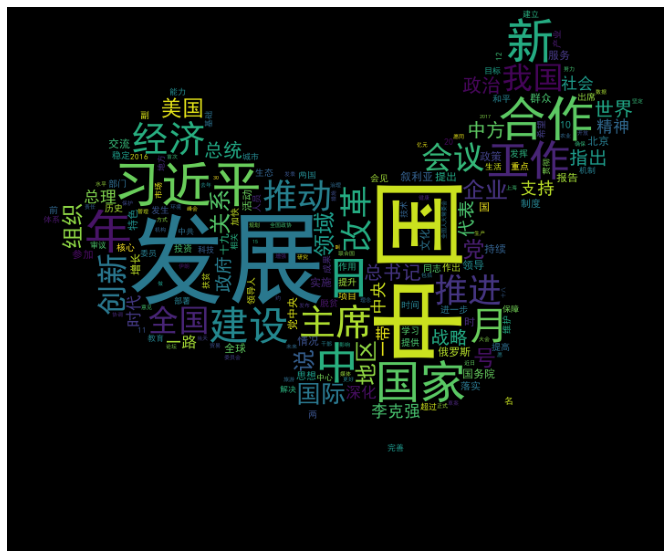

In [114]:
#严格按出现频率决定出现字数的大小
img=wc.generate_from_frequencies(c)
plt.figure(figsize=(15,10))
plt.imshow(img)
plt.axis('off')

# 文本向量化
- 建模进行的是数学运算，因此需要数值类型数据；模型需要结构化数据，而文本是非结构化数据
- 文本向量化需要传递空格分开的字符串数组类型
- 因此需要将文本转换为数值特征向量的过程，该过程就为文本向量化，步骤如下：
    - 对文本分词，拆分为更容易处理的单词
    - 将单词转换为数值类型，即使用合适和数值来表示每个单词

## 词袋模型
- 词袋模型是一种能够将文本向量化的方式。返回的是频数
- 词袋模型中，每个文档为一个样本，每个不重复的单词为一个特征，单词在文档中出现的次数作为特征值，即将文本数据转换为结构化数据
    - 其中单词的出现频率越高，表示该单词越重要
- 如果未知文档的单词不在训练集中，则在词袋模型中无法体现
- CountVectorizer在实现上，将文档向量化为稀疏矩阵，比toarray()直接转换为稠密矩阵好，因为稠密矩阵会占据大量空间。

## TF-IDF
- 返回的是重要性权重【0-1】
- 比词袋模型多考虑了一点。
- 降低了某些单词在当前文档和其他文档中都频繁出现的重要性。即TF—IDF可以用来调整单词在文档中的权重。由两部分组成：
    - 1.TF词频，指一个单词在文档中出现的次数
    - 2.IDF逆文档频率

# 建立模型
- 去除之前的num字段

In [116]:
news.drop('num',axis=1,inplace=True)

## 构建训练集与测试集
- 文本向量化需要传递空格分开的字符串数组类型。目前词汇是以列表类型，将每条新闻的词汇组合在一起，成为字符串类型，使用空格分隔

In [125]:
def join(text_list):
    return ' '.join(text_list)

news['content']=news['content'].apply(join)
news.sample(5)

,date,tag,headline,content
10863,2017-07-03,国内,中巴经济走廊首个绿色环保电站投运,中巴 经济 走廊 首个 绿色 环保 电站 巴基斯坦 萨 希瓦 燃煤 电站 建成 投运 电站 ...
12096,2017-08-31,详细全文,国务院严肃处理两起特别重大煤矿瓦斯爆炸事故,近日 国务院 严肃处理 重庆市 永川 区金 山沟 煤业 有限责任 公司 1031 内蒙古自治...
293,2016-01-19,国内,多国遭遇暴雪天气,近日 欧洲 国 土耳其 迎来 强 降雪 天气 大雪 地区 道路 关闭 航班 取消 居民 生活...
20110,2018-09-08,国内,第四届中国西藏旅游文化国际博览会举行,为期 五天 第四届 中国 西藏 旅游 文化 国际 博览会 昨晚 拉萨 开幕 本届 藏 博会 ...
13307,2017-10-25,详细全文,习近平在十九届中共中央政治局常委同中外记者见面时强调 新时代要有新气象更要有新作为 中国人民...,世界 目光 聚焦 中国 刚刚 中国共产党 第十九届 中央委员会 第一次 全体会议 当选 中共...


- 把标签列tag转换为离散值

In [126]:
#详细全文也是国内新闻
news['tag']=news['tag'].map({'详细全文':0,'国内':0,'国际':1})
news['tag'].value_counts()

0    17715
1     3018
Name: tag, dtype: int64

- 对样本数据进行切分，构建训练集和测试集

In [127]:
from sklearn.model_selection import train_test_split

X=news['content']
y=news['tag']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)
print('训练集样本数：',y_train.shape[0],'测试集样本数：',y_test.shape[0])

训练集样本数： 15549 测试集样本数： 5184


## 特征选择

### 特征维度
- 首先将文本数据向量化操作。
- 使用TfidfVectorizer类，在训练集上进行训练，然后分别对训练集与测试集实施转换

In [128]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec=TfidfVectorizer(ngram_range=(1,2))
X_train_tran=vec.fit_transform(X_train)#利用X_train训练数据，返回是结果是0-1的模型
X_test_tran=vec.transform(X_test)#应用到X_test
display(X_train_tran,X_test_tran)
#得到是稀疏矩阵
#899351反映的是特征值中不重复出现的数量

<15549x899351 sparse matrix of type '<class 'numpy.float64'>'
	with 2481579 stored elements in Compressed Sparse Row format>

<5184x899351 sparse matrix of type '<class 'numpy.float64'>'
	with 596898 stored elements in Compressed Sparse Row format>

- 成功进行文本向量化的转换，数据存储在稀疏矩阵中，但是调用稀疏矩阵的toarray方法，不能查看到TF-IDF值，因为内存不够

### 方差分析
- 在使用词袋模型向量化后。产生过多的特征。在将数据送入模型前，先进行特征选择
- 使用方差分析来进行特征选择。方差分析是用来分析两个或多个样本（来自不同总体）的均值是否相等，进而可以用来检验分类变量与连续变量之间是否相关，
- 检验方式为，根据分类变量的不同取值，将样本进行分组。
- 根据国内，国际分组看TF-IDF均值是否一样，如果两个TF-IDF相同，说明这个特征对类别变量的影响不大，应剔除

In [129]:
from sklearn.feature_selection import f_classif

#原假设：均值相等；备择假设：均值不等
#根据y进行分组，计算X中，每个特征的F值与P值
#F值越大，p值越小
f_classif(X_train_tran,y_train)
#第一个为F值，第二个为p值

(array([0.49288906, 0.1728806 , 0.34218753, ..., 0.1728806 , 0.1728806 ,
        0.1728806 ]),
 array([0.48265189, 0.67757006, 0.55857774, ..., 0.67757006, 0.67757006,
        0.67757006]))

In [130]:
from sklearn.feature_selection import SelectKBest #选择k个最好的特征

#tf-idf值不需要太多的精度，使用32位的浮点数
X_train_tran=X_train_tran.astype(np.float32)
X_test_tran=X_test_tran.astype(np.float32)
#定义特征选择器，用来选择最好的k个特征
selector=SelectKBest(f_classif,k=min(20000,X_train_tran.shape[1]))#选择20000个特征
selector.fit(X_train_tran,y_train)
#对训练集与测试集进行转换（选择特征）
X_train_tran=selector.transform(X_train_tran)
X_test_tran=selector.transform(X_test_tran)
print(X_train_tran.shape,X_test_tran.shape)

(15549, 20000) (5184, 20000)


## 逻辑回归

In [133]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

param=[{'penalty':['l1','l2'],'C':[0.1,1,10],
       'solver':['liblinear']},
      {'penalty':['elasticnet'],'C':[0.1,1,10],
      'solver':['saga'],'l1_ratio':[0.5]}]
gs=GridSearchCV(estimator=LogisticRegression(),param_grid=param,
               cv=2,scoring='f1',n_jobs=-1,verbose=10)
#cv=2,表示2折
gs.fit(X_train_tran,y_train)
print(gs.best_params_)
y_hat=gs.best_estimator_.predict(X_test_tran)
print(classification_report(y_test,y_hat))#打印结果报告
#结果越大，效果越好

Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done  13 out of  18 | elapsed:    8.9s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done  15 out of  18 | elapsed:   10.6s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   56.7s finished


{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      4458
           1       0.69      0.59      0.64       726

    accuracy                           0.90      5184
   macro avg       0.81      0.77      0.79      5184
weighted avg       0.90      0.90      0.90      5184



# 总结